In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

64.62074386690352 162.28411163229714
14.473952211477794 -78.67714913824628
-33.743159106442576 152.54480976260913
-26.730056978732364 44.81876802960397
-6.761150339208186 123.0087183732287
-24.634491403174124 -117.25217401971824
-59.00485492246282 -95.53081341539023
23.915024545651363 37.967237293694865
18.865407422237837 10.74812550132853
27.00407886368592 108.32496844025894
5.233555486470749 42.02810447106506
75.30327439991336 -172.77707504585592
35.779237846282285 -124.58361520985676
20.748663345506202 -1.9476980651006386
46.67660478101212 78.51672102595205
-5.172389037980821 15.08966093025981
77.3374046812927 -93.07611230802517
26.07386971221851 -55.90442552397482
72.57805560477269 46.176562360897236
24.20326741363347 94.00914348133915
-48.212865017363 142.06088461694026
-6.645417178183223 -51.09931929990799
-89.26726169528426 -91.03940381788742
-79.07294157743623 -161.50442442740183
-35.51095972722551 -55.67050338822142
-66.5717944709877 38.138230440233826
-42.230347251438324 146.

-81.74108423919326 -105.20279645186649
-66.66545758290752 -84.88577581141281
82.83836401785189 -141.71058982463745
-82.5539769697539 -139.65702999385562
29.04805722084106 179.18590613293958
68.48173674949484 -145.76454724232292
55.86332960669003 50.56939401143484
4.078423394892965 26.003156372336207
-41.64774765700936 172.63859013562825
-31.530068014698116 51.01355128391418
16.238429307841685 -69.88806460121343
-85.73810037831161 -141.54831983990493
88.34271401468521 -7.723050947283667
-51.64195605022455 -16.175958515894393
-88.71895682272181 29.569041755656087
78.0612050635213 160.80378399723833
-19.276048135093376 -114.3966511645689
44.81325038474361 -18.752595254653045
-29.301383795555267 80.68879174580127
0.9666480390572474 22.23248653742283
-6.212316189813379 -118.06673445218033
-29.754425169903527 -145.94638070572978
68.9490921180155 71.89159323606037
52.73801386406251 -167.05294316006484
-15.893226896243675 23.696548917124204
72.75088993650934 -35.227267555123774
75.782870640107

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 75.49,
  'feels_like': 75.65,
  'temp_min': 70.83,
  'temp_max': 78.69,
  'pressure': 1017,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 0, 'gust': 0},
 'clouds': {'all': 99},
 'dt': 1657040845,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1657012399,
  'sunset': 1657067038},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1657012399,
 'sunset': 1657067038}

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 78.22 64 100 10.36


In [24]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-05 17:17:01'

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | evensk
Processing Record 2 of Set 1 | san andres
Processing Record 3 of Set 1 | nelson bay
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | katobu
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | umm lajj
Processing Record 9 of Set 1 | bilma
Processing Record 10 of Set 1 | kaili
Processing Record 11 of Set 1 | mandera
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | half moon bay
Processing Record 14 of Set 1 | araouane
Processing Record 15 of Set 1 | ushtobe
Processing Record 16 of Set 1 | mbanza-ngungu
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | kakching
Processing Record 21 of Set 1 

Processing Record 40 of Set 4 | gat
Processing Record 41 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | pahuatlan
City not found. Skipping...
Processing Record 46 of Set 4 | bengkulu
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | riberalta
Processing Record 49 of Set 4 | binga
Processing Record 50 of Set 4 | atkinson
Processing Record 1 of Set 5 | yarovoye
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | te anau
Processing Record 4 of Set 5 | yeppoon
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | hanko
Processing Record 7 of Set 5 | lake havasu city
Processing Record 8 of Set 5 | marcona
City not found. Skipping...
Processing Record 9 of Set 5 | murgab
Processing Record 10 of Set 5 | campbellsville
Processing Record 11 of Set 5 | lebu
Processing Reco

Processing Record 30 of Set 8 | sarankhola
Processing Record 31 of Set 8 | kudahuvadhoo
Processing Record 32 of Set 8 | mocambique
City not found. Skipping...
Processing Record 33 of Set 8 | pafos
Processing Record 34 of Set 8 | duz
City not found. Skipping...
Processing Record 35 of Set 8 | padilla
Processing Record 36 of Set 8 | jaumave
Processing Record 37 of Set 8 | nsoko
Processing Record 38 of Set 8 | magadan
Processing Record 39 of Set 8 | ketchikan
Processing Record 40 of Set 8 | weyburn
Processing Record 41 of Set 8 | nantucket
Processing Record 42 of Set 8 | kazachinskoye
Processing Record 43 of Set 8 | nouadhibou
Processing Record 44 of Set 8 | pisco
Processing Record 45 of Set 8 | dombarovskiy
Processing Record 46 of Set 8 | cortez
Processing Record 47 of Set 8 | souillac
Processing Record 48 of Set 8 | dzhebariki-khaya
Processing Record 49 of Set 8 | babstovo
Processing Record 50 of Set 8 | hakvik
City not found. Skipping...
Processing Record 1 of Set 9 | vestmannaeyjar
Pr

Processing Record 21 of Set 12 | cockburn town
Processing Record 22 of Set 12 | ise
Processing Record 23 of Set 12 | mielec
Processing Record 24 of Set 12 | south sioux city
Processing Record 25 of Set 12 | san-pedro
Processing Record 26 of Set 12 | kommunar
Processing Record 27 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 12 | gualaco
Processing Record 29 of Set 12 | muisne
Processing Record 30 of Set 12 | huarmey
Processing Record 31 of Set 12 | san carlos de bariloche
Processing Record 32 of Set 12 | huaibei
Processing Record 33 of Set 12 | maniitsoq
Processing Record 34 of Set 12 | golden
Processing Record 35 of Set 12 | neiafu
Processing Record 36 of Set 12 | padang
Processing Record 37 of Set 12 | jubayl
City not found. Skipping...
Processing Record 38 of Set 12 | fayaoue
Processing Record 39 of Set 12 | mackenzie
Processing Record 40 of Set 12 | marystown
Processing Record 41 of Set 12 | oistins
Processing Record 42 of Set 12 | saleaula
City not f

In [28]:
len(city_data)

570

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Evensk,61.9500,159.2333,51.64,82,100,5.53,RU,2022-07-05 19:05:46
1,San Andres,12.5847,-81.7006,84.22,84,40,13.80,CO,2022-07-05 19:05:46
2,Nelson Bay,-32.7167,152.1500,64.00,99,100,13.00,AU,2022-07-05 19:05:46
3,Katobu,-4.9408,122.5276,73.31,94,100,4.43,ID,2022-07-05 19:05:46
4,Rikitea,-23.1203,-134.9692,76.05,77,2,17.72,PF,2022-07-05 19:05:18
5,Punta Arenas,-53.1500,-70.9167,30.31,93,20,6.91,CL,2022-07-05 19:02:44
6,Umm Lajj,25.0213,37.2685,88.63,50,6,5.14,SA,2022-07-05 19:03:33
7,Bilma,18.6853,12.9164,96.82,12,10,6.98,NE,2022-07-05 19:05:47
8,Kaili,-3.4626,120.2147,66.34,91,83,3.02,ID,2022-07-05 19:05:47
9,Mandera,3.9366,41.8670,80.91,49,28,10.67,KE,2022-07-05 19:02:29


In [30]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Evensk,RU,2022-07-05 19:05:46,61.9500,159.2333,51.64,82,100,5.53
1,San Andres,CO,2022-07-05 19:05:46,12.5847,-81.7006,84.22,84,40,13.80
2,Nelson Bay,AU,2022-07-05 19:05:46,-32.7167,152.1500,64.00,99,100,13.00
3,Katobu,ID,2022-07-05 19:05:46,-4.9408,122.5276,73.31,94,100,4.43
4,Rikitea,PF,2022-07-05 19:05:18,-23.1203,-134.9692,76.05,77,2,17.72
5,Punta Arenas,CL,2022-07-05 19:02:44,-53.1500,-70.9167,30.31,93,20,6.91
6,Umm Lajj,SA,2022-07-05 19:03:33,25.0213,37.2685,88.63,50,6,5.14
7,Bilma,NE,2022-07-05 19:05:47,18.6853,12.9164,96.82,12,10,6.98
8,Kaili,ID,2022-07-05 19:05:47,-3.4626,120.2147,66.34,91,83,3.02
9,Mandera,KE,2022-07-05 19:02:29,3.9366,41.8670,80.91,49,28,10.67


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

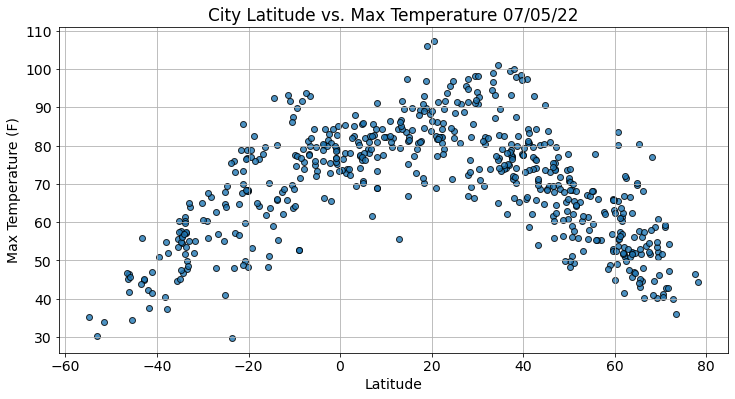

In [45]:
# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(12,6))
plt.rcParams.update({"font.size":14})
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

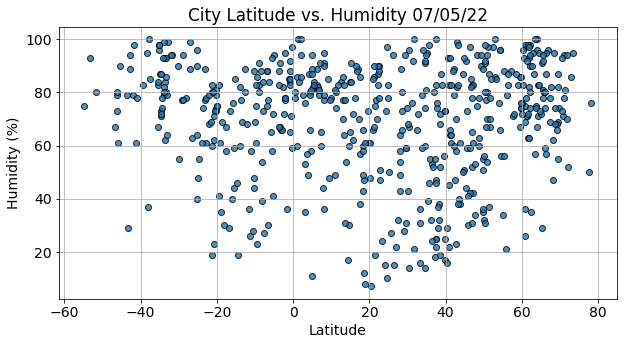

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.figure(figsize=(10,5))
plt.rcParams.update({"font.size":14})
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

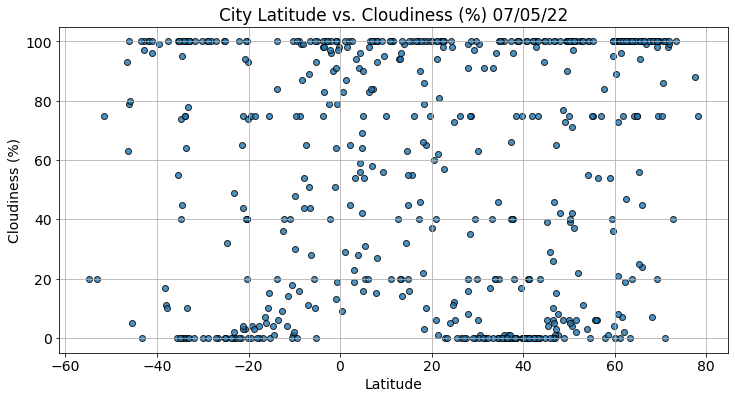

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.figure(figsize=(10,5))
plt.rcParams.update({"font.size":14})
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

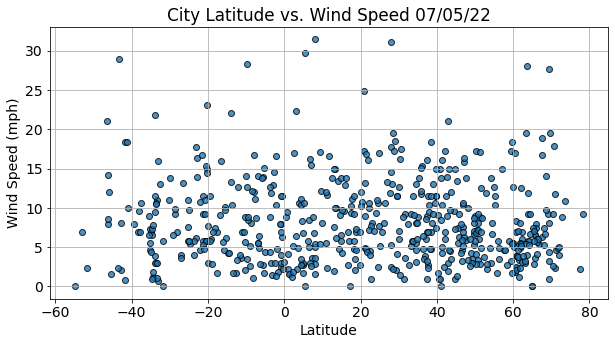

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.figure(figsize=(10,5))
plt.rcParams.update({"font.size":14})
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()